### **Introducción**

El siguiente estudio de caso forma parte del proceso de finalización del Certificado de Análisis de Datos de Google, en el cual se busca aplicar y desarrollar las habilidades adquiridas en el programa a un problema práctico. Para ello, se me pide asumir el papel de un analista de datos junior, que trabaja en el equipo de análisis computacional de datos de marketing para una empresa ficticia de bicicletas llamada Cyclistic, y aplicar los seis pasos del proceso de análisis de datos enseñados en el programa: preguntar, preparar, procesar, analizar, compartir y actuar, a una tarea empresarial.

### **1. Fase de preguntar**

**Escenario** 

La empresa Cyclistic cuenta con una flota de 5,824 bicicletas georreferenciadas y bloqueadas en una red de 692 estaciones en toda Chicago, Estados Unidos, las cuales pueden ser desbloqueadas de una estación y entregadas en cualquier otra estación de la red. 

Cyclistic cuenta para sus clientes pases de un solo viaje, pases de un día completo y membresías anuales. A los clientes que compran pases de un solo viaje o pases de un día completo se los llama ciclistas ocasionales. Los clientes que compran membresías anuales se llaman miembros de Cyclistic.

**Descripción de la tarea empresarial**

Se ha detectado que los miembros anuales son mucho más rentables para la empresa que los clientes ocasionales, por lo que se busca maximizar el número de miembros anuales. Para esto se estableció la meta de diseñar estrategias de marketing orientadas a convertir a los ciclistas ocasionales en miembros anuales, ya que se cree que hay más posibilidades de maximizar el número de miembros anuales, atrayendo a ciclistas ocasionales que ya conocen el programa de Cyclistic y han elegido a Cyclistic para sus necesidades de movilidad, que atrayendo nuevos clientes.

Para este objetivo, la directora de marketing Lily Moreno, solicita desarrollar un análisis de los clientes de Cyclistic, tanto ocasionales como miembros anuales, que muestre las diferencias entre estos dos tipos de clientes, para así luego desarrollar estrategias de marketing efectivas para que los clientes ocasionales se conviertan en miembros.

### **2. Preparación de los datos**

Para la realización del análisis, y dado que la empresa Ciclystic es ficticia, se ocuparan los datos de viajes en bicicleta, del servicio de bicicletas compartidas Divvy de la ciudad de Chicago, operado por la empresa Bikeshare. Y se tomaran en cuenta para nuestro caso los datos de los últimos doce meses disponibles a la fecha.

**Autorización, privacidad, accesibilidad y seguridad de los datos**

El conjunto de datos es público, y esta proporcionado por Motivate International Inc, al cual se puede acceder a través del siguiente enlace: https://divvy-tripdata.s3.amazonaws.com/index.html, y el cual contiene datos (almacenados en archivos cvs), desde el año 2013 hasta la actualidad. 

Los datos a utilizar están autorizados bajo la siguiente licencia https://divvybikes.com/data-license-agreement, la cual otorga una licencia no exclusiva, libre de regalías, limitada y perpetua para acceder, reproducir, analizar, copiar, modificar, distribuir y utilizar los datos para cualquier propósito legal. 

Es necesario también considerar que por cuestiones de privacidad de los datos, se prohíbe usar información de identificación personal de los ciclistas. Esto lleva a que las observaciones de los datos a utilizar no presentan ningún tipo de información sobre quién realizo el viaje, lo que conlleva a que el análisis no podra ahondar en factores como el sexo o la edad, impidiendo segmentar los resultados por estas variables.

**Carga de datos y verificación de su estructura**

Como ya se dijo, los datos a utilizar serán los de los últimos doce meses disponibles, que para nuestros caso contaran desde diciembre de 2023, hasta noviembre de 2024. Estos datos vienen en archivos cvs mensuales, por lo cual seran cargados como data frame, para posteriormente unirlos en un solo data. Antes de unirlos, se les ha verificado que tengan el mismo número de columnas, que los nombres de estas sean iguales, y esten ordenadas de la misma forma en todos los data frame. Además de que contengan el mismo tipo de dato en sus columnas. 

In [1]:
# Cargando paquete de trabajo
library(tidyverse)

# Cargando datos
df_2023_12 <- read_csv("../input/tripdata/202312-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_01 <- read_csv("../input/tripdata/202401-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_02 <- read_csv("../input/tripdata/202402-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_03 <- read_csv("../input/tripdata/202403-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_04 <- read_csv("../input/tripdata/202404-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_05 <- read_csv("../input/tripdata/202405-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_06 <- read_csv("../input/tripdata/202406-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_07 <- read_csv("../input/tripdata/202407-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_08 <- read_csv("../input/tripdata/202408-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_09 <- read_csv("../input/tripdata/202409-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_10 <- read_csv("../input/tripdata/202410-divvy-tripdata.csv", 
                       show_col_types = FALSE)
df_2024_11 <- read_csv("../input/tripdata/202411-divvy-tripdata.csv", 
                       show_col_types = FALSE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:

# Se guardan los data frames en una lista, para verificar su estructura de columnas y tipo de datos
data_frames <- list(
    df_2023_12, df_2024_01, df_2024_02, df_2024_03, df_2024_04, df_2024_05,
    df_2024_06, df_2024_07, df_2024_08, df_2024_09, df_2024_10, df_2024_11
)

# Se obtienen los nombres de todas las columnas de los data frames
columnas <- lapply(data_frames, colnames)

#Se verifica que todas las columnas en orden, nombre y cantidad sean iguales
columnas_iguales <- all(
    sapply(columnas, function(x) identical(x, columnas[[1]]))
)

if (columnas_iguales) {                              
  print("Los data frame tienen la misma estructura de columnas")
} else {
  print("Se encontraron diferencias en las columnas de los data frame.")
}

[1] "Los data frame tienen la misma estructura de columnas"


In [3]:
# Se obtienen los tipos de datos de todas las columnas de los data frames
tipos_columnas <- lapply(data_frames, function(df) sapply(df, class))

# Se verifica si el tipo de datos de las columnas de los data son iguales o no
tipos_iguales <- all(
    sapply(tipos_columnas, function(x) identical(x, tipos_columnas[[1]]))
)

if (tipos_iguales) {
  print("Los data frames tienen los mismos tipos de datos en sus columnas.")
} else {
  print("Existen diferencias en los tipos de datos de las columnas.")
}

[1] "Los data frames tienen los mismos tipos de datos en sus columnas."


Finalmente ya siendo verificado que todos los data frame, contienen la misma estructura de columnas y los mismos tipos de dato, se procede a unificarlos en un solo data frame llamado tripdata, y el cual se utilizara para el siguiente paso. 

In [4]:
# Uniendo los datos en un solo data frame
tripdata <- bind_rows(data_frames)

### **3. Procesar los datos**

Ahora que los datos han sido unificados en un solo data frame, se procederá a examinarlos, verificar si existen errores, realizar una limpieza de estos, y transformarlos en caso de ser necesitario, con el fin de poder trabajar con ellos eficazmente. Comenzaremos por obtener una vista general de los datos. 

In [5]:
# Se obtiene información del data frame
glimpse(tripdata)

Rows: 5,906,269
Columns: 13
$ ride_id            <chr> "C9BD54F578F57246", "CDBD92F067FA620E", "ABC0858E52…
$ rideable_type      <chr> "electric_bike", "electric_bike", "electric_bike", …
$ started_at         <dttm> 2023-12-02 18:44:01, 2023-12-02 18:48:19, 2023-12-…
$ ended_at           <dttm> 2023-12-02 18:47:51, 2023-12-02 18:54:48, 2023-12-…
$ start_station_name <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_station_id   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_lat          <dbl> 41.92, 41.92, 41.89, 41.95, 41.92, 41.91, 41.99, 42…
$ start_lng          <dbl> -87.66, -87.66, -87.62, -87.65, -87.64, -87.63, -87…
$ end_lat            <dbl> 41.92, 41.89, 41.90, 41.94, 41.93, 41.88, 42.00, 41…
$ end_lng            <dbl> -87.66, -87.64, -87.64, -87.65, -87.64, -87.65, -87…
$ member_cas

Se obtiene que el data frame contiene 13 columnas y 5.906.269 de observaciones. Este tiene información del id y el tipo de bicicleta utilizado en el viaje, la fecha y hora del inicio y fin del viaje, el nombre e id de la estación de inicio y fin del viaje, la latitud y longitud de la estación de inicio y fin del viaje, y el tipo de usuario que realizo el viaje.

A continuación, se procederá a limpiar el data frame eliminando filas duplicadas y aquellas que contengan valores NA. Luego, se revisarán las etiquetas de las columnas member_casual y rideable_type para detectar y corregir posibles inconsistencias.

In [6]:
# Se eliminan filas duplicadas del data frame
tripdata <- distinct(tripdata)

# Se eliminan filas con valores NA
tripdata <- drop_na(tripdata)

# Se revisa la cantidad de observaciones que quedan
nrow(tripdata)

[1] 4244722

In [7]:
# Se revisan las etiquetas de la columnas member_casual
table(tripdata$member_casual)

# Se revisan las etiquetas de la columna rideable_type
table(tripdata$rideable_type)


 casual  member 
1530084 2714638 


    classic_bike    electric_bike electric_scooter 
         2762084          1434811            47827 

Tras eliminar los valores duplicados y NA, el data frame se ha reducido a 4.244.722 observaciones. Además, se verificó que no existen inconsistencias en las etiquetas de las columnas member_casual y rideable_type. 

Pasaremos por lo tanto, a agregar algunas columnas que seran útiles para el posterior analisis. Se crearan variables de fecha que permitan realizar agregaciónes de año, mes y día. 

También se generará una columna llamada day_of_week donde se determinara en que día de la semana comenzo el viaje. Luego otra columna llamada day_type, para determinar si el viaje fue realizado un día de semana o fin de semana. Una colunma con nombre start_hour, para ver en que rango horario comenzaron los viajes. Y finalmente una columna llamada season para identificar las estaciones del año en que fueron realizados los viajes. 

Por último, se añadirá la columna ride_length, en la que se cálculara la duración de los viajes en segundo, restando el valor de la columna started_at al de ended_at. 

In [8]:
# Se crea columna date, con la fecha del viaje
tripdata$date <- as.Date(tripdata$started_at)

# Se crea columna month
tripdata$month <- format(as.Date(tripdata$started_at), "%m")

# Se transforman los valores de la columna month a tipo factor
tripdata$month <- factor(
    tripdata$month, 
    levels = sprintf("%02d", 1:12), 
    labels = month.name # Se le asigna su nombre a cada mes
)

# Se crea columna day
tripdata$day <- format(as.Date(tripdata$started_at), "%d")

# Se crea columna year 
tripdata$year <- format(as.Date(tripdata$started_at), "%Y")

In [9]:
# Se crea columna day_of_week
tripdata$day_of_week <- format(as.Date(tripdata$started_at), "%A")

# Se transforman los valores de la columna day_of_week a tipo factor
tripdata$day_of_week <- factor(
  tripdata$day_of_week, 
  levels = c("Monday", "Tuesday", "Wednesday", "Thursday", 
             "Friday", "Saturday", "Sunday")
)

# Se crea columna day_type que diferencia entre días de semana y fines de semana
tripdata$day_type <- ifelse(
  tripdata$day_of_week %in% c("Saturday", "Sunday"),"weekend", "weekday"
)

# Se crea columna season 
tripdata$season <- with(tripdata, case_when(
  (format(started_at, "%m-%d") >= "03-21" 
     & format(started_at, "%m-%d") <= "06-20") ~ "Spring",
  (format(started_at, "%m-%d") >= "06-21" 
     & format(started_at, "%m-%d") <= "09-22") ~ "Summer",
  (format(started_at, "%m-%d") >= "09-23" 
     & format(started_at, "%m-%d") <= "12-20") ~ "Autumn",
  TRUE ~ "Winter" 
))
# Se transforman los valores de la columna season a tipo factor
tripdata$season <- factor(
  tripdata$season, 
  levels = c("Spring", "Summer", "Autumn", "Winter")
)

# Se crea columna start_hour
tripdata$start_hour <- format(tripdata$started_at, "%H")

# Se transforman los valores de la columna start_hour a tipo factor
tripdata$start_hour <- factor(tripdata$start_hour, levels = sprintf("%02d", 0:23))


In [10]:
# Se agrega columna ride_length con la duración en segundos del viaje
tripdata$ride_length <- difftime(
  tripdata$ended_at, 
  tripdata$started_at, 
  units = "secs"
)

# Se convierte el tipo de dato de ride_length a númerico
tripdata$ride_length <- as.numeric(tripdata$ride_length)


Finalmente, se realiza una limpieza de datos erróneos que podrían afectar el análisis. Se crea un nuevo data frame llamado tripdata_clean, en el cual se eliminarán las filas de viajes que contengan en la columna start_station_name la etiqueta 'HQ QR', ya que esto indicaría que las bicicletas estaban en chequeos de calidad y, por lo tanto, no corresponderían a viajes reales.

Además, se eliminarán las filas en las que el cálculo de la columna ride_length haya resultado en un valor negativo o igual a cero, ya que esto indicaría que los datos de inicio o finalización del viaje son erróneos o no tienen relevancia para el análisis.

In [11]:
# Se crea el nuevo data frame tripdata_clean con las limpieza de datos erroneos
tripdata_clean <- tripdata[
  !(tripdata$start_station_name == "HQ QR" | tripdata$ride_length <= 0), 
]

# Finalmente verificamo nuestro nuevo data frame
glimpse(tripdata_clean)

Rows: 4,244,484
Columns: 22
$ ride_id            <chr> "84BFC1F137684EAB", "EEC92D30A70471E5", "1C33464DEE…
$ rideable_type      <chr> "classic_bike", "classic_bike", "electric_bike", "c…
$ started_at         <dttm> 2023-12-02 23:12:51, 2023-12-14 13:43:14, 2023-12-…
$ ended_at           <dttm> 2023-12-02 23:21:01, 2023-12-14 13:44:14, 2023-12-…
$ start_station_name <chr> "DuSable Museum", "California Ave & Division St", "…
$ start_station_id   <chr> "KA1503000075", "13256", "20106", "TA1309000067", "…
$ end_station_name   <chr> "Cottage Grove Ave & 51st St", "California Ave & Di…
$ end_station_id     <chr> "TA1309000067", "13256", "20106", "TA1309000067", "…
$ start_lat          <dbl> 41.79157, 41.90303, 41.71895, 41.80304, 41.80304, 4…
$ start_lng          <dbl> -87.60785, -87.69747, -87.60831, -87.60662, -87.606…
$ end_lat            <dbl> 41.80304, 41.90303, 41.71896, 41.80304, 41.80304, 4…
$ end_lng            <dbl> -87.60662, -87.69747, -87.60830, -87.60662, -87.606…
$ member_cas

### **4. Análisis**

Ya con nuestro data frame limpio y con las modificaciones necesarias realizadas, se procedera al análisis. Este estara centrado en identificar tendencias y diferencias en el uso de las bicicletas entre los usuarios ocasionales y los miembros del programa de Cyclistic.

Se comenzara por analizar la distribución porcentual en la cantidad de viajes realizados, dentro de los doce meses del año, como de los días de la semana, y de las horas del día, realizando la distinción entre la distribución que presentan los usuarios ocasionales y los miembros.

In [12]:
# Se crea una tabla con la suma de los viajes por mes y tipo de usuario 
monthly_distribution <- tripdata_clean %>%
  group_by(month, member_casual) %>%
  summarize(count = n(), .groups = 'drop')

# Distribución porcentual de viajes realizados por mes según el tipo de usuario
monthly_distribution_percent <- monthly_distribution %>%
  group_by(member_casual) %>%
  mutate(percent = (count / sum(count)) * 100) %>%  
  mutate(percent = sprintf("%.2f%%", percent)) %>%  
  select(month, member_casual, percent) %>%
  pivot_wider(names_from = member_casual, values_from = percent) %>%
  arrange(month) 

monthly_distribution_percent

month,casual,member
<fct>,<chr>,<chr>
January,1.16%,3.54%
February,2.49%,5.40%
March,4.10%,6.17%
April,6.14%,7.51%
May,10.95%,10.12%
June,13.62%,10.53%
July,15.16%,11.38%
August,14.94%,11.52%
September,14.13%,11.82%


In [13]:
# Se crea una tabla con la suma de los viajes por día de la semana y tipo de usuario 
weekly_distribution <- tripdata_clean %>%
  group_by(day_of_week, member_casual) %>%
  summarize(count = n(), .groups = 'drop')

# Distribución porcentual de viajes realizados en los días de la semana 
weekly_distribution_percent <- weekly_distribution %>%
  group_by(member_casual) %>%
  mutate(percent = (count / sum(count)) * 100) %>%  
  mutate(percent = sprintf("%.2f%%", percent)) %>%  
  select(day_of_week, member_casual, percent) %>%
  pivot_wider(names_from = member_casual, values_from = percent) %>% 
  arrange(day_of_week)

weekly_distribution_percent

day_of_week,casual,member
<fct>,<chr>,<chr>
Monday,11.75%,14.56%
Tuesday,10.62%,15.48%
Wednesday,12.36%,16.70%
Thursday,12.11%,15.58%
Friday,14.79%,14.24%
Saturday,20.92%,12.49%
Sunday,17.44%,10.95%


In [14]:
# Se crea una tabla con la suma de los viajes por rango horario y tipo de usuario
hourly_distribution <- tripdata_clean %>%
  group_by(start_hour, member_casual) %>%
  summarize(count = n(), .groups = 'drop')

# Distribución porcentual de viajes realizados en los distintos rangos horarios
hourly_distribution_percent <- hourly_distribution %>%
  group_by(member_casual) %>%
  mutate(percent = (count / sum(count)) * 100) %>%  
  mutate(percent = sprintf("%.2f%%", percent)) %>%  
  select(start_hour, member_casual, percent) %>%
  pivot_wider(names_from = member_casual, values_from = percent) %>% 
  arrange(start_hour)

hourly_distribution_percent

start_hour,casual,member
<fct>,<chr>,<chr>
00,1.47%,0.74%
01,0.98%,0.43%
02,0.57%,0.23%
03,0.31%,0.16%
04,0.24%,0.20%
05,0.55%,0.96%
06,1.32%,2.99%
07,2.54%,5.82%
08,3.57%,7.18%


Para especificar aún más nuestro análisis veremos la diferencia porcentual entre la cantidad de viajes realizados por los clientes ocasionales y miembros, para las estaciones del año, y una comparación entre los viajes de los días de semana y fines de semana. 

In [15]:
# Se crea una tabla con la suma de los viajes por estación del año y tipo de usuario 
season_distribution <- tripdata_clean %>%
  group_by(season, member_casual) %>%
  summarize(count = n(), .groups = 'drop')

# Distribución porcentual de viajes realizados en las estaciones del año
season_distribution_percent <- season_distribution %>%
  group_by(member_casual) %>%
  mutate(percent = (count / sum(count)) * 100) %>%  
  mutate(percent = sprintf("%.2f%%", percent)) %>%  
  select(season, member_casual, percent) %>%
  pivot_wider(names_from = member_casual, values_from = percent)

season_distribution_percent

season,casual,member
<fct>,<chr>,<chr>
Spring,26.96%,26.69%
Summer,46.16%,35.20%
Autumn,19.70%,23.93%
Winter,7.18%,14.18%


In [16]:
# Se crea una tabla con la suma de los viajes por día laboral o fin de semana
day_type_distribution <- tripdata_clean %>%
  group_by(day_type, member_casual) %>%
  summarize(count = n(), .groups = 'drop')

# Distribución porcentual de viajes realizados en cada tipo de día
day_type_distribution_percent <- day_type_distribution %>%
  group_by(member_casual) %>%
  mutate(percent = (count / sum(count)) * 100) %>%  
  mutate(percent = sprintf("%.2f%%", percent)) %>%  
  select(day_type, member_casual, percent) %>%
  pivot_wider(names_from = member_casual, values_from = percent)

day_type_distribution_percent

day_type,casual,member
<chr>,<chr>,<chr>
weekday,61.64%,76.56%
weekend,38.36%,23.44%


También realizaremos una comparación entre los tiempos de viaje de los clientes ocasionales y los miembros, y cómo son los promedios de tiempo dentro de los días de la semana, y de los distintos meses del año para nuestros dos grupos de clientes.   

In [17]:
# Tabla con los tiempos promedio de viaje para cada tipo de usuario
average_ride_length <- tripdata_clean %>%
  group_by(member_casual) %>%
  summarize(avg_ride_length = mean(ride_length, na.rm = TRUE))

average_ride_length

member_casual,avg_ride_length
<chr>,<dbl>
casual,1442.4515
member,747.9364


In [18]:
# Tiempos de viaje promedio por día de la semana (clientes ocasionales y miembros)
average_times_week <- tripdata_clean %>%
  group_by(day_of_week, member_casual) %>%
  summarize(
    avg_ride_length = mean(ride_length, na.rm = TRUE), 
    .groups = "drop"
  ) %>%
  pivot_wider(names_from = member_casual, values_from = avg_ride_length) %>%
  arrange(day_of_week)

average_times_week

day_of_week,casual,member
<fct>,<dbl>,<dbl>
Monday,1395.197,714.0121
Tuesday,1240.842,715.8631
Wednesday,1281.723,729.2688
Thursday,1253.012,715.1491
Friday,1389.760,726.3407
Saturday,1633.448,838.5472
Sunday,1658.128,838.2401


In [19]:
# Tiempos de viaje promedio por mes para clientes ocasionales y miembros
average_times_month <- tripdata_clean %>%
  group_by(month, member_casual) %>%
  summarize(
      avg_ride_length = mean(ride_length, na.rm = TRUE), 
      .groups = "drop"
  ) %>%
  pivot_wider(names_from = member_casual, values_from = avg_ride_length) %>%
  arrange(month)

average_times_month

month,casual,member
<fct>,<dbl>,<dbl>
January,932.2414,693.3893
February,1189.5017,704.6847
March,1322.2046,684.1544
April,1486.5893,737.1641
May,1616.5783,798.2578
June,1587.0231,821.0368
July,1588.9000,812.4017
August,1488.8746,788.3134
September,1329.1370,736.7307


Podemos ver que los tiempos promedio de viaje son más alto, en los días sabado y domingo, tanto para los clientes ocasionales como para los miembros, y que esta tendencia se marca también en los tiempos promedio de los meses de primavera y verano. 

Revisaremos por lo tanto, más a detalle las diferencias que existen entre los tiempos de viaje, que exiten entre los días de semana y los fines de semana, y los tiempos promedios entre las distintas estaciones del año.

In [20]:
# Se cálculan los promedios de tiempo de viaje para días de semana y fines de semana
average_times_day_type <- tripdata_clean %>%
  group_by(day_type, member_casual) %>%
  summarize(
      avg_ride_length = mean(ride_length, na.rm = TRUE),
      .groups = "drop"
  ) %>%
  pivot_wider(names_from = member_casual, values_from = avg_ride_length) 

average_times_day_type

day_type,casual,member
<chr>,<dbl>,<dbl>
weekday,1316.597,720.2388
weekend,1644.668,838.4038


In [21]:
# Se calculan promedios de tiempos de viaje por estación del año
average_times_season <- tripdata_clean %>%
  group_by(season, member_casual) %>%
  summarize(
      avg_ride_length = mean(ride_length, na.rm = TRUE),
      .groups = "drop"
  ) %>%
  pivot_wider(names_from = member_casual, values_from = avg_ride_length) 

average_times_season

season,casual,member
<fct>,<dbl>,<dbl>
Spring,1551.582,775.0229
Summer,1508.906,790.3017
Autumn,1221.825,685.3346
Winter,1210.868,697.4294


Finalmente analizaremos que tipo de bicicletas utilizan más los clientes ocasionales y los miembros, y como son los tiempos promedio de viaje según el tipo de bicicleta. 

In [22]:
# Tabla con la cantidad de viajes realizados con cada tipo de bicicleta 
type_bike_usage <- tripdata_clean %>%
  group_by(member_casual, rideable_type) %>%
  summarize(count = n(), .groups = "drop") 

# Cálculo del porcentaje de viajes realizados con cada tipo de bicicleta
type_bike_percent <- type_bike_usage %>%
  group_by(member_casual) %>%  
  mutate(percent = (count / sum(count)) * 100) %>%
  mutate(percent = sprintf("%.2f%%", percent)) %>%  
  select(rideable_type, member_casual, percent) %>%
  pivot_wider(names_from = member_casual, values_from = percent)

type_bike_percent

rideable_type,casual,member
<chr>,<chr>,<chr>
classic_bike,63.80%,65.79%
electric_bike,34.52%,33.39%
electric_scooter,1.68%,0.81%


In [23]:
# Se cálcula el tiempo promedio de viaje por cada tipo de bicicleta
avg_time_bike_user <- tripdata_clean %>%
  group_by(rideable_type, member_casual) %>%
  summarize(
      avg_ride_length = mean(ride_length, na.rm = TRUE),
      .groups = "drop"
  ) %>%
  pivot_wider(names_from = member_casual, values_from = avg_ride_length)

avg_time_bike_user

rideable_type,casual,member
<chr>,<dbl>,<dbl>
classic_bike,1740.5126,802.8503
electric_bike,928.8629,646.4382
electric_scooter,677.9761,473.3882


Se observa una preferencia clara por las bicicletas clasicas, tanto en los clientes ocasionales como en los miembros, cálcularemos si está preferencia varia entre días laborales y fines de semana, y entre las estaciones del año. 

In [24]:
# Tipo de bicicleta que usan los clientes ocasionales en días de semanas y fines de semana
bike_day_type_casual <- tripdata_clean %>%
  filter(member_casual == "casual") %>% 
  group_by(day_type, rideable_type) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(day_type) %>%
  mutate(percent = (count / sum(count)) * 100) %>% 
  mutate(percent = sprintf("%.2f%%", percent)) %>%
  select(rideable_type, day_type, percent) %>%
  pivot_wider(names_from = day_type, values_from = percent) 

bike_day_type_casual

rideable_type,weekday,weekend
<chr>,<chr>,<chr>
classic_bike,61.09%,68.15%
electric_bike,36.93%,30.65%
electric_scooter,1.98%,1.21%


In [25]:
# Tipo de bicicleta que usan los miembros en días de semanas y fines de semana
bike_day_type_member <- tripdata_clean %>%
  filter(member_casual == "member") %>% 
  group_by(day_type, rideable_type) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(day_type) %>%
  mutate(percent = (count / sum(count)) * 100) %>% 
  mutate(percent = sprintf("%.2f%%", percent)) %>%
  select(rideable_type, day_type, percent) %>%
  pivot_wider(names_from = day_type, values_from = percent) 

bike_day_type_member

rideable_type,weekday,weekend
<chr>,<chr>,<chr>
classic_bike,65.12%,67.98%
electric_bike,34.02%,31.34%
electric_scooter,0.85%,0.68%


In [26]:
# Tipo de bicicleta que usan los clientes ocasionales en las estaciones del año
bike_season_casual <- tripdata_clean %>%
  filter(member_casual == "casual") %>% 
  group_by(season, rideable_type) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(season) %>%
  mutate(percent = (count / sum(count)) * 100) %>% 
  mutate(percent = sprintf("%.2f%%", percent)) %>%
  select(rideable_type, season, percent) %>%
  pivot_wider(names_from = season, values_from = percent) 

bike_season_casual

rideable_type,Spring,Summer,Autumn,Winter
<chr>,<chr>,<chr>,<chr>,<chr>
classic_bike,66.32%,64.58%,57.96%,65.32%
electric_bike,33.68%,32.68%,39.92%,34.68%
electric_scooter,NA,2.74%,2.12%,NA


In [27]:
# Tipo de bicicleta que usan los clientes ocasionales en las estaciones del año
bike_season_member <- tripdata_clean %>%
  filter(member_casual == "member") %>% 
  group_by(season, rideable_type) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(season) %>%
  mutate(percent = (count / sum(count)) * 100) %>%
  mutate(percent = sprintf("%.2f%%", percent)) %>%
  select(rideable_type, season, percent) %>%
  pivot_wider(names_from = season, values_from = percent) 

bike_season_member

rideable_type,Spring,Summer,Autumn,Winter
<chr>,<chr>,<chr>,<chr>,<chr>
classic_bike,66.96%,65.37%,62.25%,70.61%
electric_bike,33.04%,32.91%,36.88%,29.39%
electric_scooter,NA,1.72%,0.87%,NA


**Conclusiones del análisis** 

Luego de realizar distintos cálculos y resumenes comparando datos de los clientes ocasionales y miembros, podemos sacar las siguientes conclusiones:

+ Como primer punto se observa una tendencia más estable en la cantidad de viajes que realizan los miembros durante los meses del año, que la de viajes de los clientes casuales. Por ejemplo , un 46.16% de los viajes realizados por los clientes ocasionales son hechos en los meses de verano, mientras que solo el 7.18% son efectuados en invierno, y aunque los miembros igual presentan en el verano la mayor cantidad de viajes, y en el invierno la menor, esta diferencia no es tan acentuada, ya que el verano representa solo un 35.2% de los viajes, mientras que en el invierno se realizan un 14.18% de estos.
     
+ Respecto a la cantidad de viajes dentro de los días de la semana, notamos una diferencia clara en su distribución, ya que para los clientes ocasionales los fines de semana son los días con más porcentaje de viajes, representando el sabado un 20.92% y el domingo un 17.44% de los viajes totales de este grupo, mientras que para los miembros estos días representan los de menos porcentaje de viajes, con un 12.49% para el sabado y un 10.95% para el domingo.

+ El hecho de que los miembros tengan un uso de las bicicletas más estable durante los meses del año, y que las utilicen más los días laborales que los fines de semana, lleva a concluir de que estos las usan mayormente como medio de transporte, mientras que los clientes ocasionales las estarían utilizando mayormente de forma recreacional o deportiva, ya que se destaca que estos las utilizan significativamente más en meses de verano y los fines de semana. Esta conclusión se reafirma también al observar los rangos horarios en que se realizan los viajes, ya que mientras la tendencia para los clientes ocasionales es que la cantidad de viajes vaya aumentando gradualmente a medida que avanzan las horas del día, para ir declinando pasadas las 19 horas. En el grupo de los miembros existe dos rangos horarios con un aumento significativo en la cantidad de viajes, que serían entre las 7 y 9 horas de la mañana, y luego entre las 16 y 19 horas de la tarde, lo que nos vuelve a llevar al punto de que estos últimos las estarían utilizando mayoritariamente como un medio de transporte para ir al trabajo, ya que coinciden con los horarios tradicionales de entrada y salida del trabajo.

+ Otro punto del análisis donde existe una clara diferencia entre los clientes ocasionales y los miembros, es en los tiempos promedio de viaje, ya que mientras los primeros tienen un tiempo promedio de 1442 segundos, los miembros tiene un promedio en sus viajes de 747 segundos, practicamente la mitad que la de los clientes ocasionales. Lo que vuelve a apuntar a que los clientes ocasionales ocuparian las bicicletas con fines más recreativos o de ocio, a diferencia de los miembros que las ocuparían para viajes más especificos, lo que coincidiria con la conclusión de que estos le dan un uso como medio de transporte.

+ También respecto a los tiempos promedio de viaje, se observa que al igual que con la cantidad de viajes, los miembros presentan tiempos de viaje más estable tanto dentro de los meses del año, como dentro de los días de la semana, mientras que para los clientes ocasionales, se notan diferencias más marcadas en sus tiempos de viaje. Por ejemplo, para los clientes ocasionales, el tiempos promedio de viaje en los fines de semana es de más de 300 segundos que en los días laborales, mientras que para los miembros la diferencia no supera los 120 segundos. Lo que índica que no solo los clientes ocasionales usan más las bicicletas en fines de semana o meses de verano, sino que sus tiempos de uso también son más largos, comparado con los miembros que presentan una tendencia más estable.

+ Finalmente respecto al tipo de bicicleta utilizada en los viajes, no se observan grandes diferencias entre clientes ocasionales y miembros, ambos grupos utilizan mayormente las bicicletas clasicas en sus viajes, con un 63.79% para los clientes ocasionales y un 65.79% para los miembros, mientras que los scooter representan un porcentaje marginal en las preferencias de ambos grupos, siendo las bicicletas electricas las que ocupan el porcentaje restante en las preferencias. Estos porcentajes de entre un 60 y 70 porciento de las preferencias de las bicicletas clasicas, se mantienen tambíen al analizar por estaciones del año y días de la semana. Ahora, es necesario aclarar también, que debido a que no se conoce el dato del porcentaje que representa cada tipo de bicicleta dentro del stock disponible, no es posible concluir que los porcentajes antes indicados, se deban a una preferencia de los clientes, o puedan estar influenciados simplemente por el stock disponible de cada tipo de bicicleta.  

### **5. Compartir**

Luego de realizado el análisis pasaremos a graficar los resultados obtenidos con el fin de visualizar mejor las tendencias y diferencias encontradas, entre los clientes ocasionales y los miembros.

Partiremos por graficar la frecuencia en la cantidad de viajes realizados por clientes ocasionales y miembros, tanto dentro de las estaciones del año, como los días de la semana, y las horas del día. 

Se aprecia que los miembros presentan una menor variación en la cantidad de viajes dentro de los meses del año, a diferencia de los clientes ocasionales, que presenta una baja más acentuada en el uso de bicicletas en los meses de otoño e invierno. 

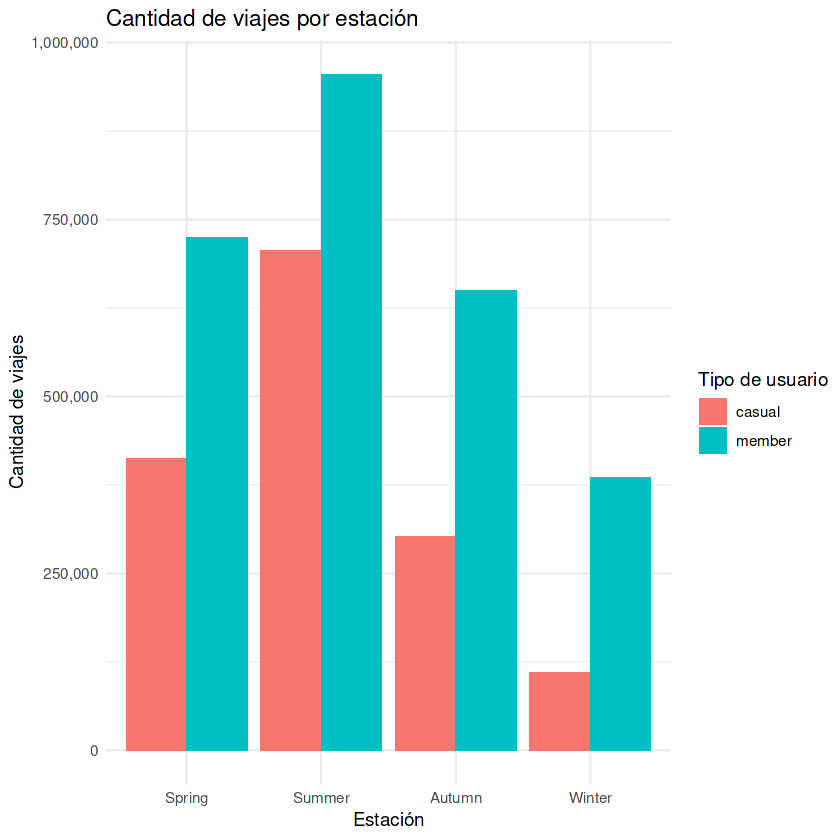

In [28]:
#  Grafico de frecuencia de viajes en el año, por tipo de usuario
ggplot(season_distribution, aes(x = season, y = count, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_y_continuous(labels = scales::label_comma()) +
  labs(
    title = "Cantidad de viajes por estación",
    x = "Estación",
    y = "Cantidad de viajes",
    fill = "Tipo de usuario"
  ) +
  theme_minimal()

Respecto al uso de las bicicletas durante los días de la semana notamos como existe una clara diferencia entre los clientes ocasionales y los miembros, ya que mientras los primeros aumentan la cantidad de viajes dentro del fin de semana, para los miembros esta tendencia es al revés, siendo los días laborales donde más viajes se realizan, y declinan en cantidad hacía el fin de semana.

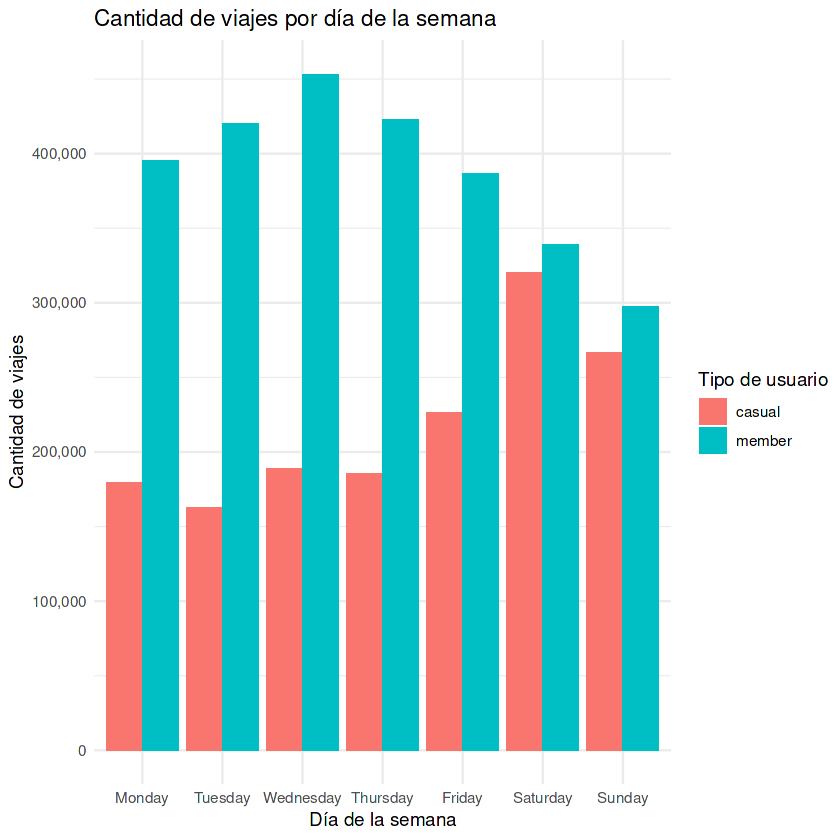

In [29]:
# Grafico de frecuencia de viajes realizados en la semana, por tipo de usuario
ggplot(weekly_distribution, aes(x = day_of_week, y = count, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_y_continuous(labels = scales::label_comma()) +
  labs(
    title = "Cantidad de viajes por día de la semana",
    x = "Día de la semana",
    y = "Cantidad de viajes",
    fill = "Tipo de usuario"
  ) +
  theme_minimal()

Existe un comportamiento distinto tambíen en cómo se distribuyen los viajes dentro de las horas del día, ya que los miembros presentan picos de viajes en el horario de las 7 a 9 horas, para luego bajar en cantidad y volver a tener un nuevo peak entre las 16 y 19 horas. Mientras que la tendencia para los clientes ocasionales es ir aumentando gradualmente en la cantidad de viajes durante las horas días, teniendo su peak de viajes entre las 17 y 18 horas, para luego ir bajando nuevamente. 

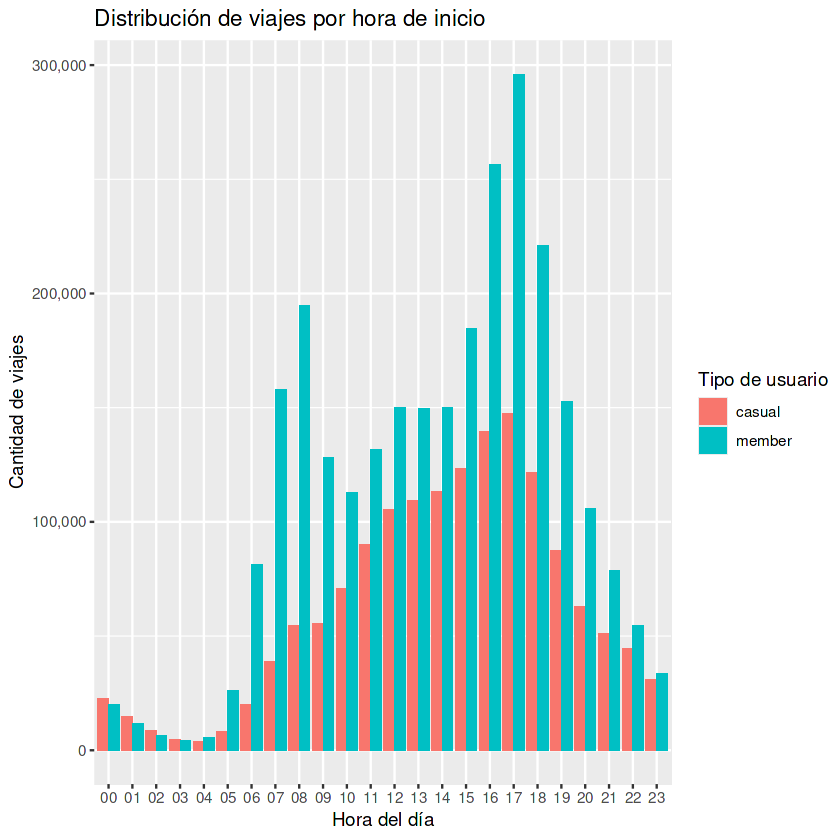

In [30]:
# Grafico de frecuencia de viajes en el día, por tipo de usuario
ggplot(hourly_distribution, aes(x = start_hour, y = count, fill = member_casual)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_x_discrete(labels = c(sprintf("%02d", 0:23))) +
  scale_y_continuous(labels = scales::label_comma()) +
  labs(
    title = "Distribución de viajes por hora de inicio",
    x = "Hora del día",
    y = "Cantidad de viajes",
    fill = "Tipo de usuario"
  ) 

Ahora, en cuanto a los tiempos promedios de viaje, se nota una clara diferencia entre los clientes ocasionales y los miembros, ya que los primeros practicamente doblan en tiempo a los miembros. 

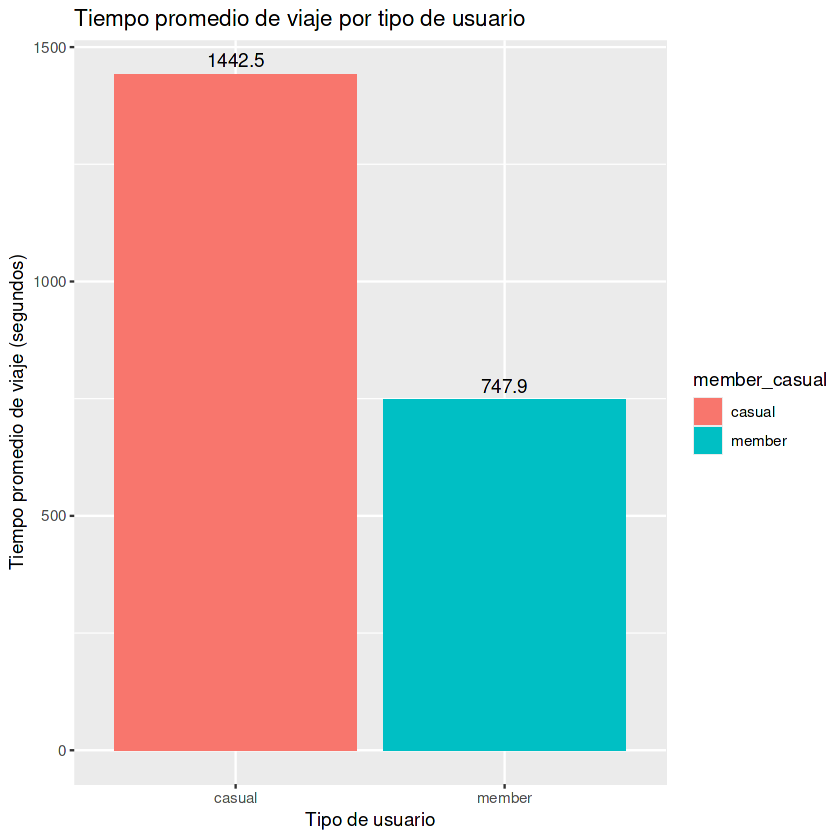

In [31]:
# Gráfico con los tiempos promedio de viaje para clientes ocasionales y miembros
ggplot(average_ride_length, aes(x = member_casual, y = avg_ride_length, fill = member_casual)) +
  geom_col() +  
  labs(
    title = "Tiempo promedio de viaje por tipo de usuario",
    x = "Tipo de usuario",
    y = "Tiempo promedio de viaje (segundos)"
  ) +
  geom_text(aes(label = round(avg_ride_length, 1)), vjust = -0.5) 

Respecto a los tiempos de viaje promedio dentro de la semana podemos apreciar, que aunque en ambos grupos los tiempos de viaje aumenta en los fines de semana, este aumento es más pronunciado para los clientes ocasionales, que para los miembros.

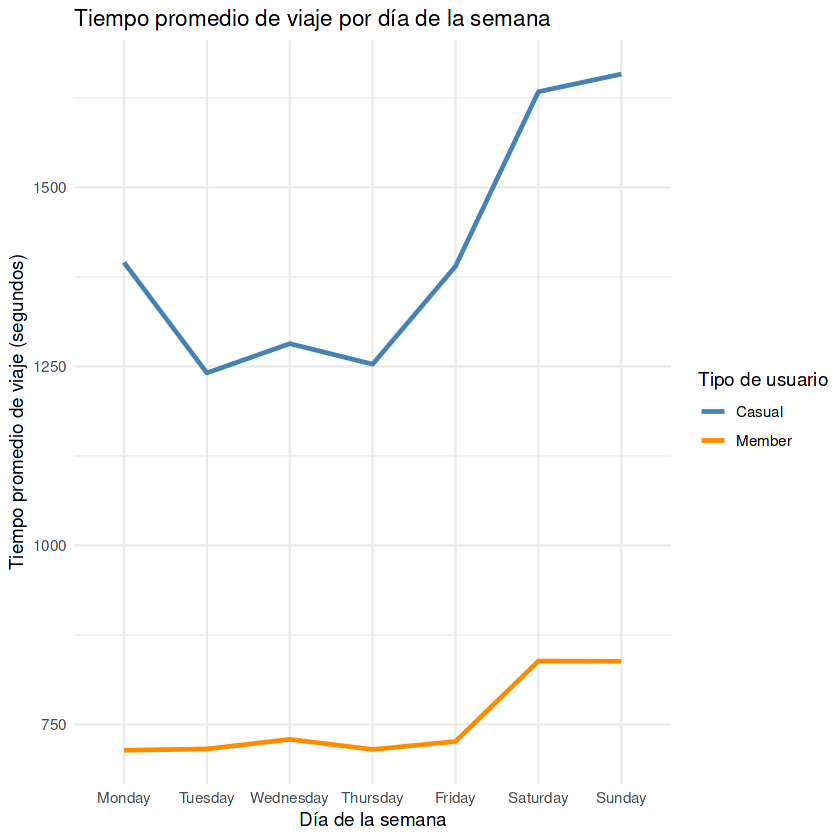

In [32]:
# Gráfico con tiempos promedio de viaje dentro de la semana
ggplot(average_times_week, aes(x = day_of_week)) +
  geom_line(aes(y = casual, group = 1, color = "Casual"), linewidth = 1) +
  geom_line(aes(y = member, group = 1, color = "Member"), linewidth = 1) +
  labs(
    title = "Tiempo promedio de viaje por día de la semana",
    x = "Día de la semana",
    y = "Tiempo promedio de viaje (segundos)",
    color = "Tipo de usuario"
  ) +
  scale_color_manual(values = c("Casual" = "steelblue", "Member" = "darkorange")) +
  theme_minimal()

En cuanto a los tiempos promedio de viaje dentro de los meses del año, la tendencia para ambos grupos es que aumenten los tiempos en los meses de primavera y verano, para luego bajar en otoño e invierno. Pero que al igual que en los días de la semana, esta tendencia es más acentuada para los clientes ocasionales que para los miembros, donde se nota una mayor estabilidad en los tiempos de viaje durante todo el año.

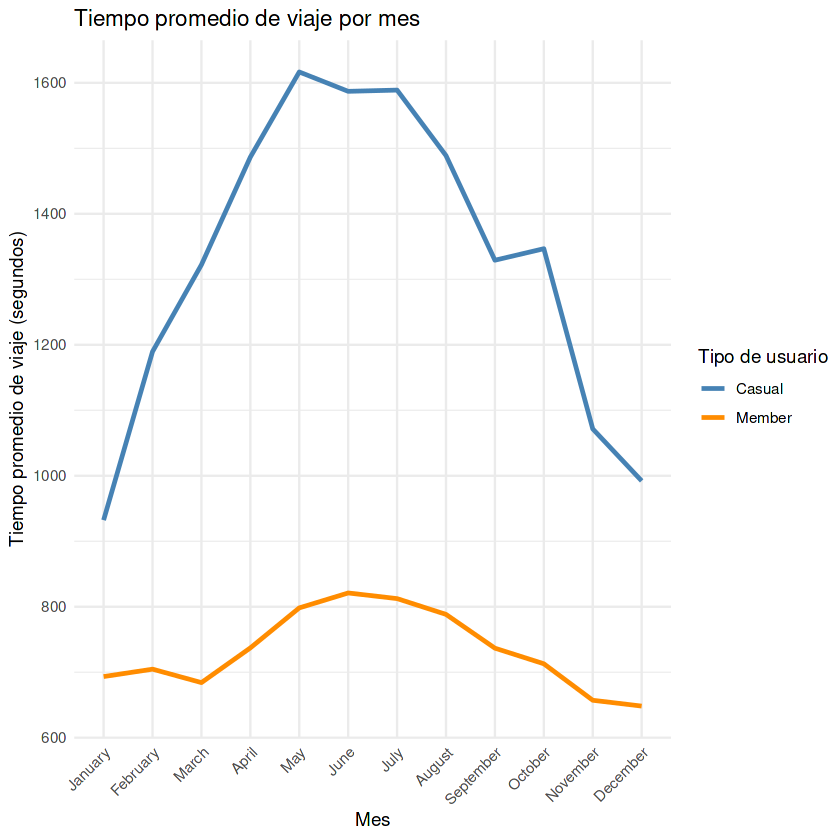

In [33]:
# Gráfico con tiempos promedio de viaje dentro del año
ggplot(average_times_month, aes(x = month)) +
  geom_line(aes(y = casual, group = 1, color = "Casual"), linewidth = 1) +
  geom_line(aes(y = member, group = 1, color = "Member"), linewidth = 1) +
  labs(
    title = "Tiempo promedio de viaje por mes",
    x = "Mes",
    y = "Tiempo promedio de viaje (segundos)",
    color = "Tipo de usuario"
  ) +
  scale_color_manual(values = c("Casual" = "steelblue", "Member" = "darkorange")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Finalmente en cuanto al tipo de bicicleta que utilizan miembros y clientes ocasionales, vemos que las preferencias son practicamente las mismas para ambos grupos, siendo las bicicletas clasicas las más solicitadas, luego las bicicletas electricas, y teniendo los scooter una demanda marginal. 

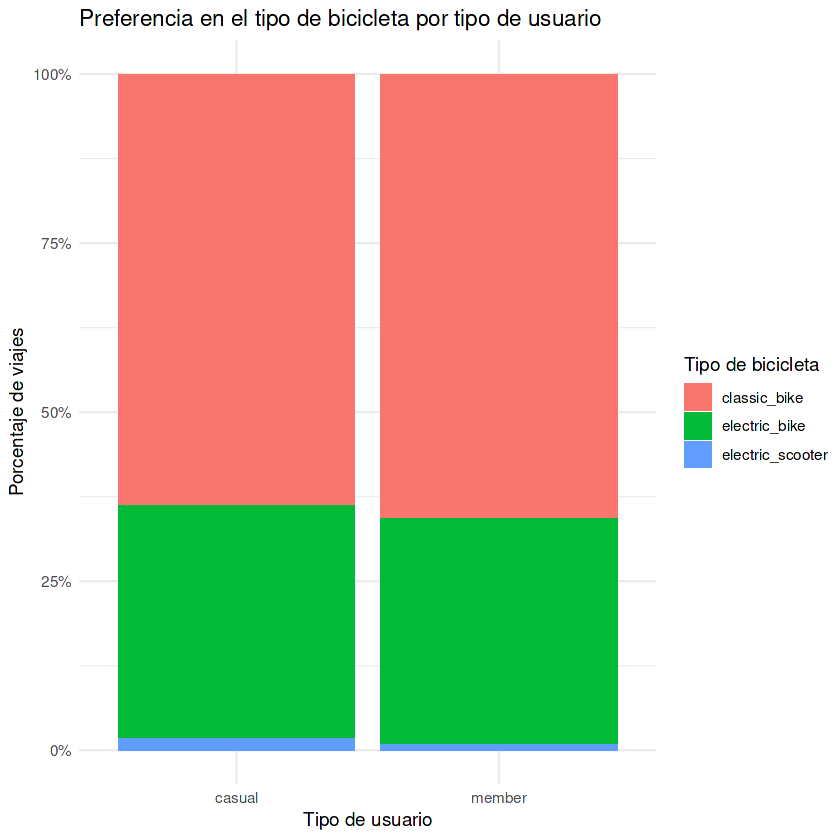

In [34]:
# Gráfico con las preferencias en el tipo de bicicleta para clientes ocasionales y  miembros
ggplot(type_bike_usage, aes(x = member_casual, y = count, fill = rideable_type)) +
  geom_bar(stat = "identity", position = "fill") +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(
    title = "Preferencia en el tipo de bicicleta por tipo de usuario",
    x = "Tipo de usuario",
    y = "Porcentaje de viajes",
    fill = "Tipo de bicicleta"
  ) +
  theme_minimal()

Podemos ver también que esta tendencia de los clientes ocasionales y los miembros a preferir las bicicletas clasicas no varía según si es día laboral o fin de semana. 

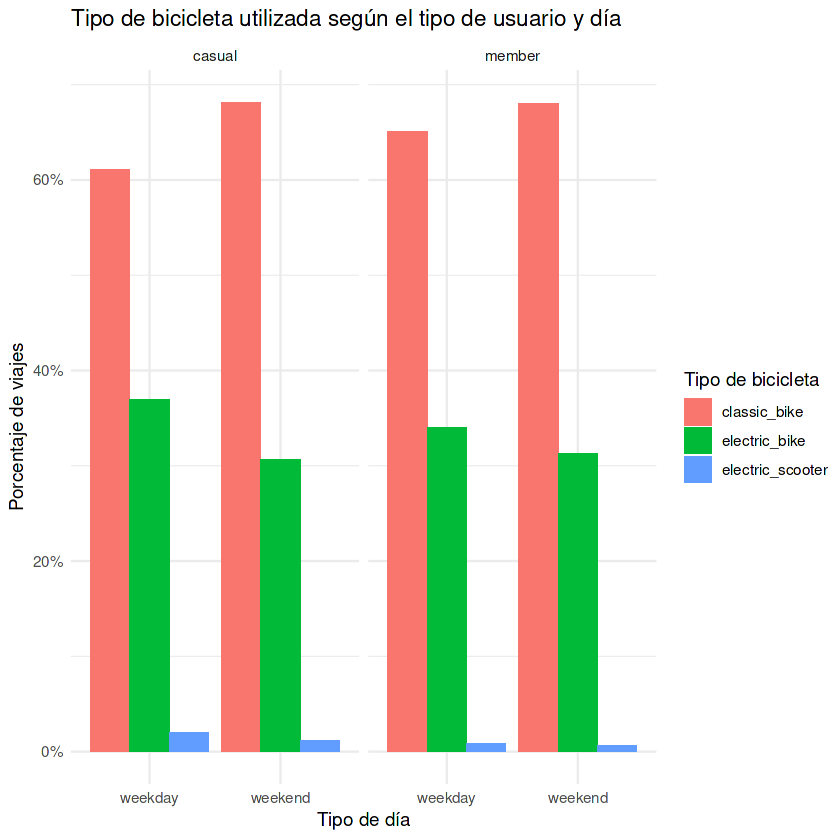

In [35]:
# Tabla con preferencias del tipo de bicicleta según tipo de usuario y tipo de día
bike_type_day_type <- tripdata_clean %>%
  group_by(member_casual, day_type, rideable_type) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(member_casual, day_type) %>%
  mutate(percent = (count / sum(count)) * 100) 

# Gráfico con preferencias del tipo de bicicleta según tipo de usuario y tipo de día
ggplot(bike_type_day_type, aes(x = day_type, y = percent, fill = rideable_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ member_casual) +  
  labs(
    title = "Tipo de bicicleta utilizada según el tipo de usuario y día",
    x = "Tipo de día",
    y = "Porcentaje de viajes",
    fill = "Tipo de bicicleta"
  ) +
  scale_y_continuous(labels = scales::label_percent(scale = 1)) +  
  theme_minimal()

Esta misma tonica a preferir las bicicletas clasicas se repite también cuando se analiza por estación del año. 

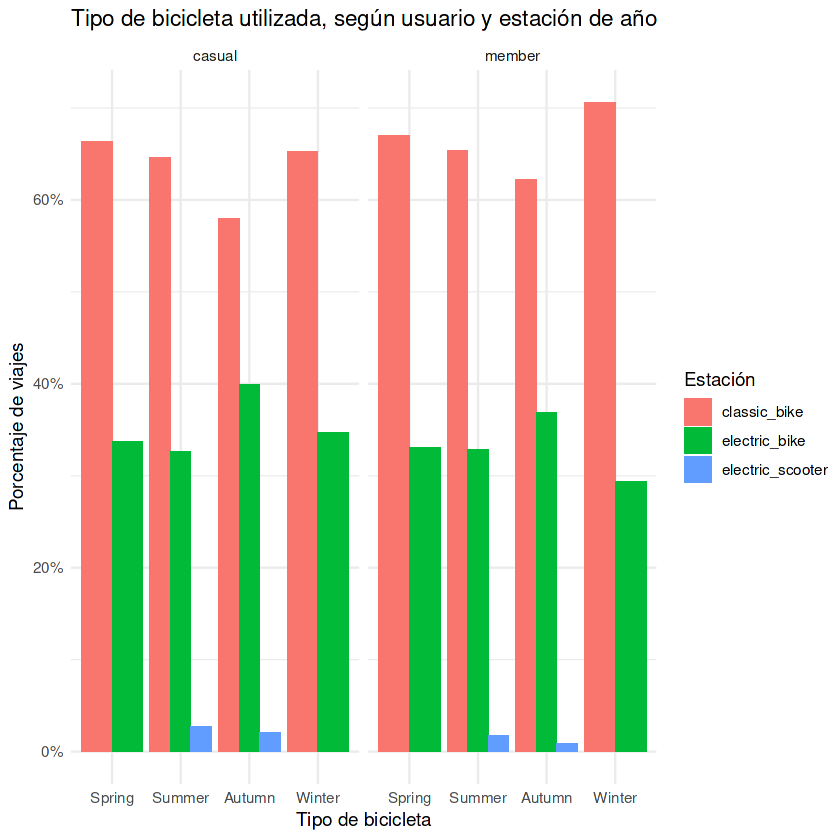

In [36]:
# Tabla con preferencias del tipo de bicicleta según tipo de usuario y estación del  año
bike_type_season <- tripdata_clean %>%
  group_by(member_casual, season, rideable_type) %>%
  summarize(count = n(), .groups = "drop") %>%
  group_by(member_casual, season) %>%
  mutate(percent = (count / sum(count)) * 100)

# Gráfico con preferencias del tipo de bicicleta según tipo de usuario y estación del año
ggplot(bike_type_season, aes(x = season, y = percent, fill = rideable_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~ member_casual) +  
  labs(
    title = "Tipo de bicicleta utilizada, según usuario y estación de año",
    x = "Tipo de bicicleta",
    y = "Porcentaje de viajes",
    fill = "Estación"
  ) +
  scale_y_continuous(labels = scales::label_percent(scale = 1)) +  
  theme_minimal()

**Límitaciones del análisis** 

Finalmente, y antes de pasar a las recomendaciones y conclusiones finales, es necesario indicar ciertas límitaciones del análisis, que están relacionadas con la falta de datos:

+ Como se mencionó anteriormente, no se dispone de información sobre el stock de cada tipo de bicicleta que posee Cyclistic. Esto podría influir en el resultado que indica que tanto los clientes ocasionales como los miembros prefieren las bicicletas clásicas. La tendencia observada en ambos grupos podría estar sesgada si el número de bicicletas clásicas disponibles es significativamente mayor en comparación con los otros tipos.
  
+ Otra limitación está relacionada con la falta de referencias individuales de los usuarios debido a restricciones de privacidad. Esto impide realizar análisis segmentados por edad o sexo, así como identificar si un mismo usuario ha realizado múltiples viajes. Contar con esta información habría permitido detectar patrones de uso más personalizados y detallados.

### **6. Actuar**

Para finalizar el informe y con el objetivo de contribuir al desarrollo de estrategias de marketing que permitan convertir a los ciclistas ocasionales en miembros anuales, se presentan tres recomendaciones basadas en las diferencias y tendencias observadas en el uso de bicicletas tanto en los ciclistas ocasionales como en los miembros anuales. 

+ El análisis mostró que los ciclistas ocasionales utilizan las bicicletas con mayor frecuencia durante la primavera y el verano. Por ello, las campañas de publicidad y marketing deberían concentrarse principalmente en estos meses del año, aprovechando el aumento en la demanda.

+ Además de su mayor uso en primavera y verano, los ciclistas ocasionales tienden a utilizar las bicicletas principalmente los fines de semana, tanto en cantidad de viajes como en tiempo de uso, lo que sugiere que las ocupan principalmente con fines recreativos o de ocio. En función de este comportamiento, podría ser beneficioso ofrecer nuevas opciones de suscripción, como una membresía trimestral o una anual exclusiva para fines de semana. Brindar alternativas más flexibles podría incentivar a los clientes ocasionales que no utilizan la bicicleta como medio de transporte a convertirse en miembros de la empresa.

+ En línea con la tendencia de que los ciclistas ocasionales utilizan las bicicletas principalmente con fines recreativos, se recomienda que las estrategias de marketing para convertirlos en miembros destaquen la bicicleta como un medio para el ocio, la recreación y el ejercicio. En este sentido, se sugiere resaltar los beneficios del ciclismo tanto para la salud física como mental, alineando la comunicación de las estrategías de marketing con estas motivaciones.